In [2]:
from google.colab import drive

# ✅ STEP 3: MOUNT GOOGLE DRIVE
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ✅ Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from collections import Counter
import json

In [4]:
# ✅ Load dataset
file_path = "/content/drive/MyDrive/Legora-Evaluation/Legal_Precedents_EDA/legal_precedent.csv"
df = pd.read_csv(file_path)

In [5]:
# ✅ Basic Overview
print("🔹 Shape:", df.shape)
print("\n🔹 Columns:\n", df.columns.tolist())
print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Data Types:\n", df.dtypes)

🔹 Shape: (518, 13)

🔹 Columns:
 ['_id', 'pdf_file_name', 'case_type', 'case_name', 'case_number', 'judges', 'case_subtype', 'court', 'outcome_tags', 'labor_tags', 'summary', 'complianceList', 'court_level']

🔹 Missing Values:
 _id                 0
pdf_file_name       6
case_type           3
case_name          59
case_number       187
judges              0
case_subtype        4
court              49
outcome_tags        2
labor_tags          2
summary             6
complianceList      3
court_level         0
dtype: int64

🔹 Data Types:
 _id               object
pdf_file_name     object
case_type         object
case_name         object
case_number       object
judges            object
case_subtype      object
court             object
outcome_tags      object
labor_tags        object
summary           object
complianceList    object
court_level       object
dtype: object


In [6]:
# ✅ Show sample data
sample_df = df.head(10)
print(tabulate(sample_df, headers='keys', tablefmt='pretty', colalign=["left"] * len(sample_df.columns)))


+---+--------------------------------------+---------------------------------------------------------------------------------------------------------------------+-----------+--------------------------------------------------------------------------------------------------------------------------------------------+-----------------------+----------------------------------------------------------------------------------------------------------------------+---------------------------------+----------------------------+------------------------------------------------------+-----------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------

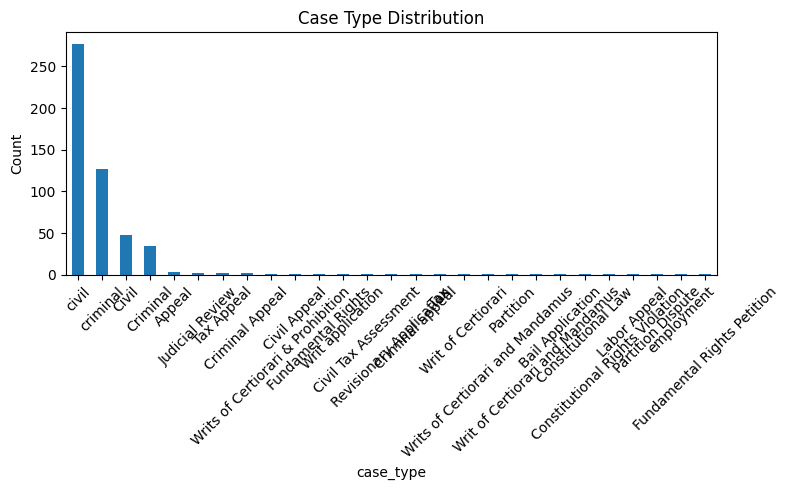

In [7]:
# ✅ Case Type Distribution
plt.figure(figsize=(8, 5))
df['case_type'].value_counts().plot(kind='bar')
plt.title('Case Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# ✅ Print all unique case types
print("All unique case types:")
print(df['case_type'].unique())


All unique case types:
['civil' 'Criminal' 'criminal' 'Civil Appeal' 'Civil' 'Fundamental Rights'
 'Writs of Certiorari & Prohibition' 'Criminal Appeal' 'Judicial Review'
 'Tax Appeal' 'Writ application' 'Appeal' 'Civil Tax Assessment'
 'Revisionary Application' 'Criminal appeal' 'Tax' 'Writ of Certiorari'
 'Writs of Certiorari and Mandamus' 'Partition'
 'Writ of Certiorari and Mandamus' 'Bail Application' nan
 'Constitutional Law' 'Constitutional Rights Violation' 'Labor Appeal'
 'Partition Dispute' 'employment' 'Fundamental Rights Petition']


In [9]:
# ✅ Define a mapping dictionary
case_type_map = {
    'civil': 'Civil',
    'Civil': 'Civil',
    'Civil Appeal': 'Civil',

    'criminal': 'Criminal',
    'Criminal': 'Criminal',
    'Criminal Appeal': 'Criminal',
    'Criminal appeal': 'Criminal',

    'Constitutional Law': 'Constitutional Law',
    'Constitutional Rights Violation': 'Constitutional Law',

    'Fundamental Rights': 'Fundamental Rights',
    'Fundamental Rights Petition': 'Fundamental Rights',

    'Writ application': 'Writ',
    'Writ of Certiorari': 'Writ',
    'Writs of Certiorari & Prohibition': 'Writ',
    'Writs of Certiorari and Mandamus': 'Writ',
    'Writ of Certiorari and Mandamus': 'Writ',

    'Tax': 'Tax',
    'Tax Appeal': 'Tax',
    'Civil Tax Assessment': 'Tax',

    'Judicial Review': 'Judicial Review',

    'Appeal': 'Appeal',
    'Labor Appeal': 'Appeal',

    'Bail Application': 'Bail',

    'Partition': 'Partition',
    'Partition Dispute': 'Partition',

    'Revisionary Application': 'Revision',

    'employment': 'Employment'
}

# ✅ Apply the mapping
df['case_type_cleaned'] = df['case_type'].map(case_type_map).fillna('Unknown')

# ✅ View cleaned unique types
print("Cleaned Case Types:")
print(sorted(df['case_type_cleaned'].unique()))

Cleaned Case Types:
['Appeal', 'Bail', 'Civil', 'Constitutional Law', 'Criminal', 'Employment', 'Fundamental Rights', 'Judicial Review', 'Partition', 'Revision', 'Tax', 'Unknown', 'Writ']


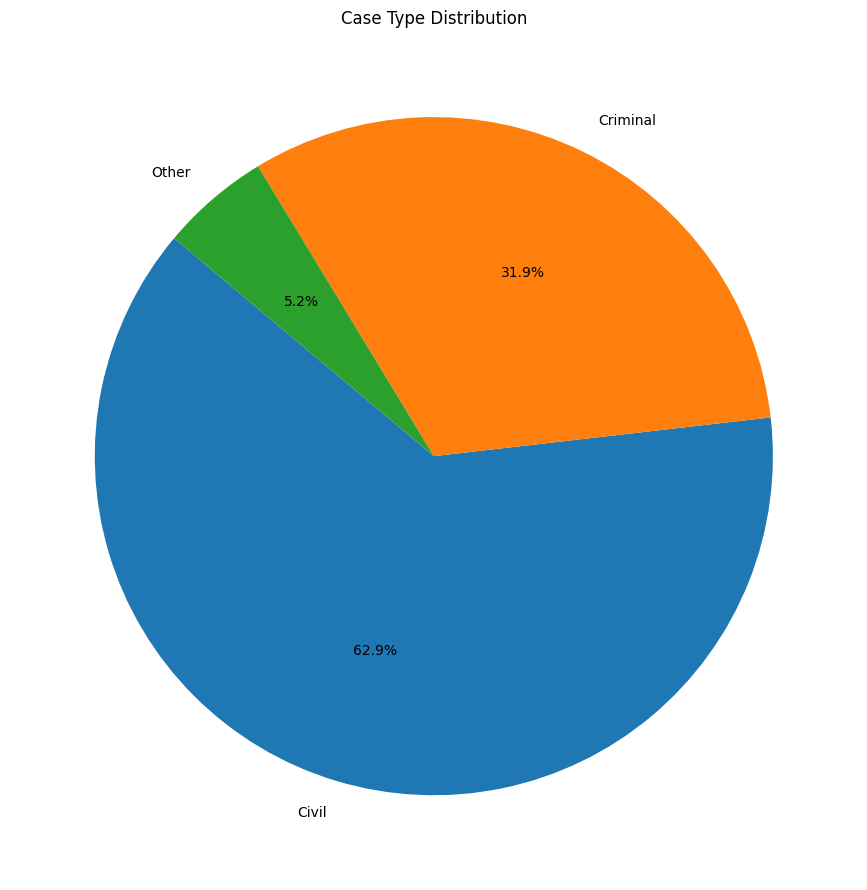

In [10]:
import matplotlib.pyplot as plt

# ✅ Count values again just in case
case_type_counts = df['case_type_cleaned'].value_counts()

# ✅ Group lesser categories under 'Other'
threshold = 10
donut_data = case_type_counts.copy()
donut_data_filtered = donut_data[donut_data >= threshold]
other_sum = donut_data[donut_data < threshold].sum()
donut_data_final = donut_data_filtered.copy()
donut_data_final['Other'] = other_sum

# ✅ Standard pie chart (full circle)
plt.figure(figsize=(9, 9))
plt.pie(
    donut_data_final,
    labels=donut_data_final.index,
    autopct='%1.1f%%',
    startangle=140
)
plt.title("Case Type Distribution")
plt.tight_layout()
plt.show()


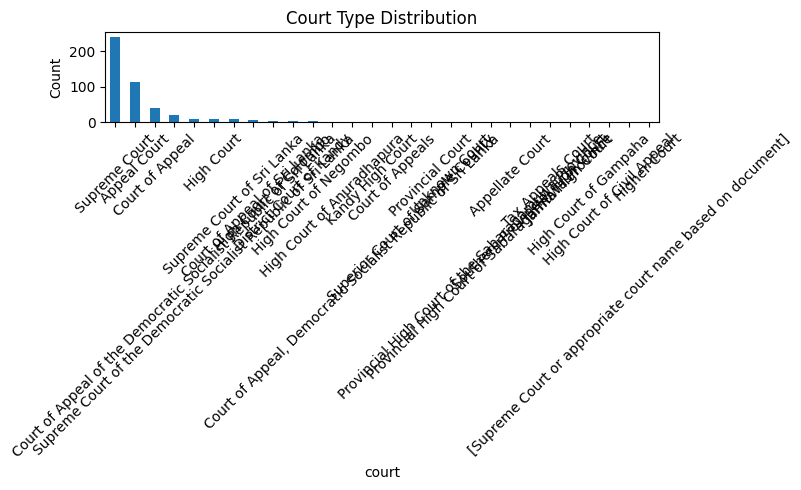

In [11]:
# ✅ Court Distribution
plt.figure(figsize=(8, 5))
df['court'].value_counts().plot(kind='bar')
plt.title('Court Type Distribution')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# ✅ Print all unique case types
print("All unique case types:")
print(df['court'].unique())

All unique case types:
['Supreme Court' 'Appeal Court' 'High Court of Colombo' 'High Court'
 'High Court of Anuradhapura' 'Supreme Court of Sri Lanka' nan
 'Kandy High Court'
 'Court of Appeal of the Democratic Socialist Republic of Sri Lanka'
 'Court of Appeal' 'Court of Appeal of Sri Lanka'
 'Supreme Court of the Democratic Socialist Republic of Sri Lanka'
 'Court of Appeal, Democratic Socialist Republic of Sri Lanka'
 'Superior Court of Sample County' 'Court of Appeals'
 'District Court of Kandy'
 'Provincial High Court of Sabaragamuwa Province' 'Provincial Court'
 'Unknown Court' 'Provincial High Court of the Sabaragamuwa Province'
 'Appellate Court' 'Southern Provincial High Court' 'Tax Appeals Court'
 'Jaffna High Court' 'High Court of Negombo' 'High Court of Gampaha'
 'High Court of Civil Appeal'
 '[Supreme Court or appropriate court name based on document]'
 'Higher Court']


In [13]:
court_mapping = {
    # Supreme Court
    'Supreme Court': 'Supreme Court',
    'Supreme Court of Sri Lanka': 'Supreme Court',
    'Supreme Court of the Democratic Socialist Republic of Sri Lanka': 'Supreme Court',
    '[Supreme Court or appropriate court name based on document]': 'Supreme Court',

    # Court of Appeal (Group All + Tax Appeals Court)
    'Appeal Court': 'Court of Appeal',
    'Court of Appeal': 'Court of Appeal',
    'Court of Appeal of Sri Lanka': 'Court of Appeal',
    'Court of Appeal of the Democratic Socialist Republic of Sri Lanka': 'Court of Appeal',
    'Court of Appeal, Democratic Socialist Republic of Sri Lanka': 'Court of Appeal',
    'Appellate Court': 'Court of Appeal',
    'Court of Appeals': 'Court of Appeal',
    'Tax Appeals Court': 'Court of Appeal',

    # High Court + Provincial High Court
    'High Court': 'High Court',
    'High Court of Colombo': 'High Court',
    'High Court of Anuradhapura': 'High Court',
    'Kandy High Court': 'High Court',
    'Jaffna High Court': 'High Court',
    'High Court of Negombo': 'High Court',
    'High Court of Gampaha': 'High Court',
    'High Court of Civil Appeal': 'High Court',
    'Provincial High Court of Sabaragamuwa Province': 'High Court',
    'Provincial High Court of the Sabaragamuwa Province': 'High Court',
    'Southern Provincial High Court': 'High Court',

    # Other (District, Provincial, Unknown, Sample)
    'District Court of Kandy': 'Other',
    'Provincial Court': 'Other',
    'Unknown Court': 'Other',
    'Superior Court of Sample County': 'Other',
    'Higher Court': 'Other'
}


In [14]:
# Apply the mapping to create a cleaned column
df['court_cleaned'] = df['court'].map(court_mapping).fillna('Unknown / Other')

# View unique cleaned court names
print(sorted(df['court_cleaned'].unique()))


['Court of Appeal', 'High Court', 'Other', 'Supreme Court', 'Unknown / Other']


<ipython-input-15-cd7625da5d15>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=court_counts.values, y=court_counts.index, palette='viridis')


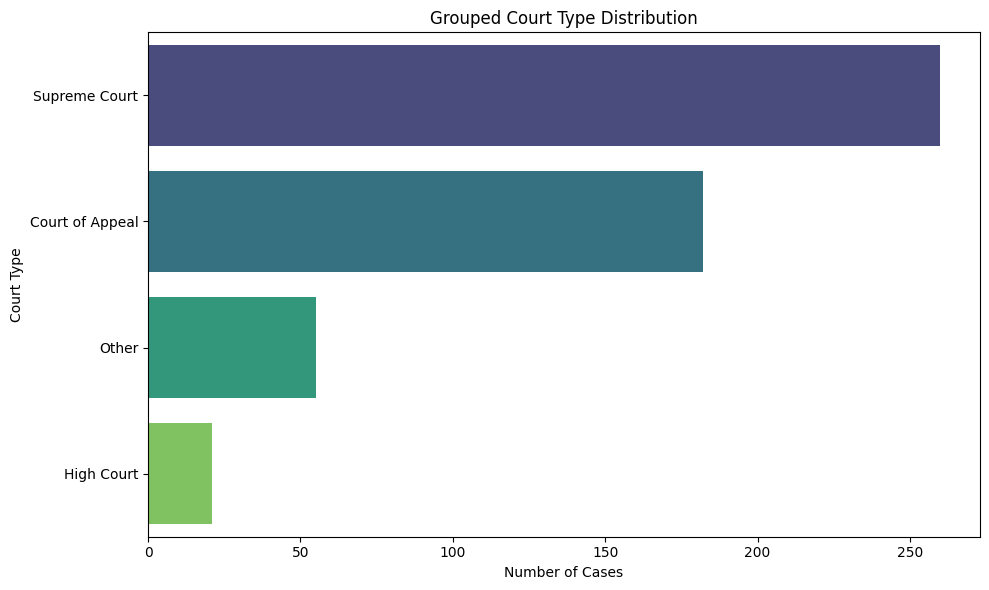

In [15]:
# Apply updated mapping
df['court_cleaned'] = df['court'].map(court_mapping).fillna('Other')

# Count values in descending order
court_counts = df['court_cleaned'].value_counts().sort_values(ascending=False)

# Plot (from highest to lowest)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=court_counts.values, y=court_counts.index, palette='viridis')
plt.title("Grouped Court Type Distribution")
plt.xlabel("Number of Cases")
plt.ylabel("Court Type")
plt.tight_layout()
plt.show()


In [16]:
# ✅ Parse list safely
def safe_parse_list(val):
    try:
        if isinstance(val, list):
            return val
        if isinstance(val, str) and val.strip().startswith('['):
            return json.loads(val.replace("'", '"'))
    except:
        return []
    return []

df['case_subtype'] = df['case_subtype'].apply(safe_parse_list)

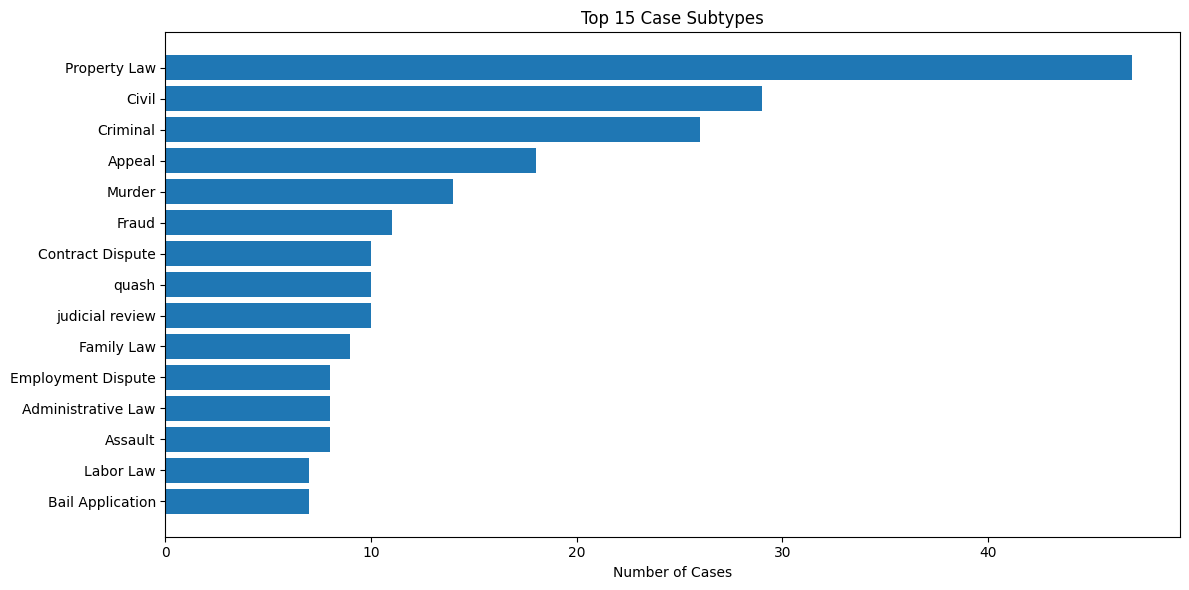

In [17]:
# ✅ Top 15 Case Subtypes
all_subtypes = [sub for sublist in df['case_subtype'] for sub in sublist if sub]
subtype_counts = Counter(all_subtypes)
subtype_df = pd.DataFrame(subtype_counts.most_common(15), columns=['Subtype', 'Count'])

plt.figure(figsize=(12, 6))
plt.barh(subtype_df['Subtype'], subtype_df['Count'])
plt.title("Top 15 Case Subtypes")
plt.xlabel("Number of Cases")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

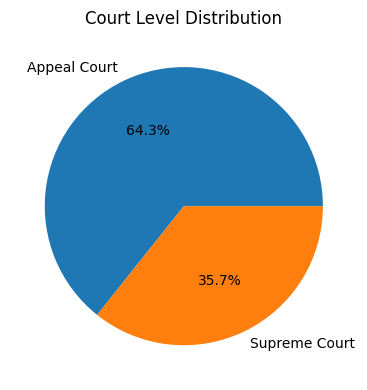

In [18]:
# ✅ Court Level Pie Chart
plt.figure(figsize=(6, 4))
df['court_level'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Court Level Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

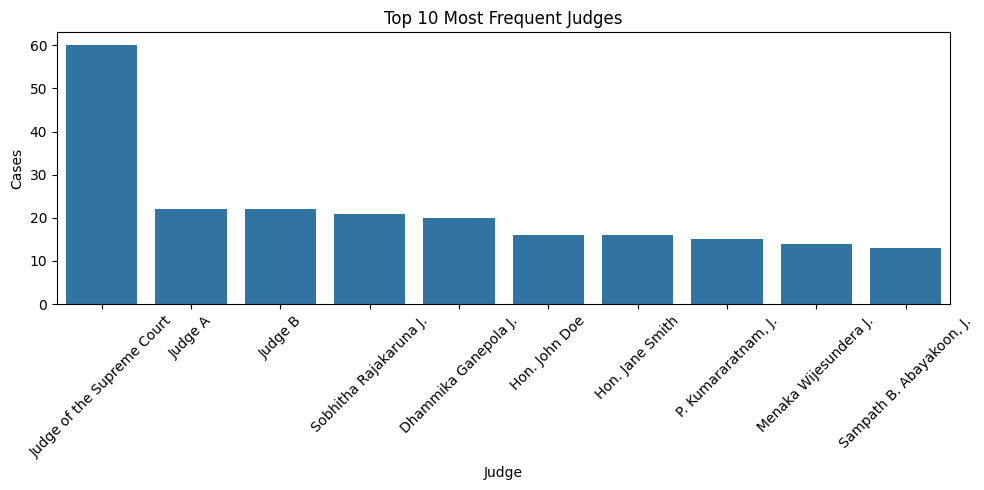

In [19]:
# ✅ Judges Frequency (Top 10)
df['judges'] = df['judges'].apply(safe_parse_list)
all_judges = Counter(judge for sublist in df['judges'] for judge in sublist)
judges_df = pd.DataFrame(all_judges.most_common(10), columns=['Judge', 'Cases'])

plt.figure(figsize=(10, 5))
sns.barplot(data=judges_df, x='Judge', y='Cases')
plt.title('Top 10 Most Frequent Judges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()